# Contents
1) imports  
2) global settings  
3) analysis  
4) Visualization  
5) A-A distance analysis  
6) no FRET distance analysis  
7) high FRET distance analysis  
8) particle alignment  

# Imports

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ImageManipulation as IM
import os
import precisionFuncs as pF
import developmental_functions as df
import AlignStructures as AS
import utility
import histogram_fitting as hfit
from lmfit import fit_report
import copy

In [5]:
#for development only
from importlib import reload

# 2) global settings

### optional: merge subfolders into one folder

In [3]:
#FRET-nanoscopy acquisition software creates one folder for each confocal area. 
#Run this function to copy all .ptu files from subfolders of the input folder ('infolder')
#by default all files will be copied into a new subfolder called 'all'.
infolder = r'P:\STED-FRET3D\02_data\211202_DNA_origami_CLR_MR'
df.simplePTUmerge(infolder)

P:\STED-FRET3D\02_data\211027_DNA_origami_CLR_MR\STED\all
creating folder


### set global parameters

In [ ]:

wdir = os.path.join(rootdir, 'STED', 'all')
resdir = os.path.join(rootdir, 'analysis')


In [ ]:
rootdir = r'P:\STED-FRET3D\02_data\211213_DNA_origami_CLR_Al594At643_MR'
wdir = os.path.join(rootdir, 'STED', 'all')
resdir = os.path.join(rootdir, 'analysis')
identifier = 'CLRAl594At643 13 Dec'

In [2]:
# directory of the dataset
rootdir = r'P:\STED-FRET3D\02_data\211213_DNA_origami_CLR_Al594At643_MR'
#where the .ptu files are located
wdir = os.path.join(rootdir, 'STED', 'all')
#where you'd like to save your result files
resdir = os.path.join(rootdir, 'analysis')
#this identifier will be used for filenames and graph titles
identifier = 'CLRAl594At643 13 Dec'

### optional: load previously analysed data

In [3]:
locfile = os.path.join(resdir, identifier  + '.spots')
anfile = os.path.join(resdir, identifier + '_an.spots')
locLst = df.loadpickle(locfile)
locLst_an = df.loadpickle(anfile)
locLst_stats = df.genStats(locLst_an)

# 3) analysis

### 1st analysis step: localization

analysing image no. 0
loading file PQSpcm_2021-12-13_17-53-45.ptu
number of records is 125578


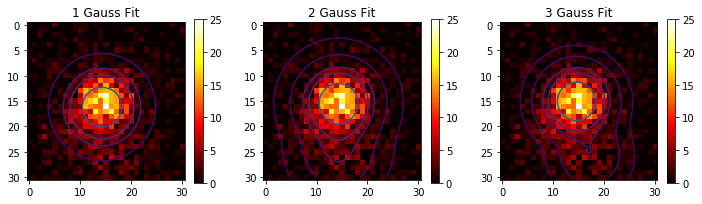

optimised 1 Gauss fit is: 
[16.19  14.274 15.308  3.983  1.     0.532 28.    19.     3.    30.
 15.     3.     4.     0.     0.     1.     0.     0.973]

optimised 2 Gauss fit is: 
[15.371 14.327 16.723  3.611  1.     0.465 24.9   14.292  2.865 30.
 15.     3.     4.     0.     0.     1.     1.     0.888]

optimised 3 Gauss fit is: 
[15.037 14.616 18.056  3.348  1.     0.416 25.605 17.338  2.507 21.559
  9.536  2.886  4.     0.     0.     1.     2.     0.84 ]

isSignificantlyLower : [ True  True  True]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.973 0.888 0.84 ]
fullfills all conditions[ True  True  True]


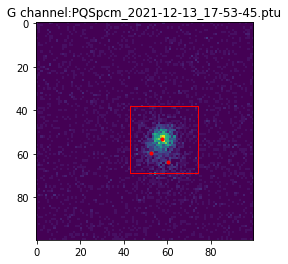

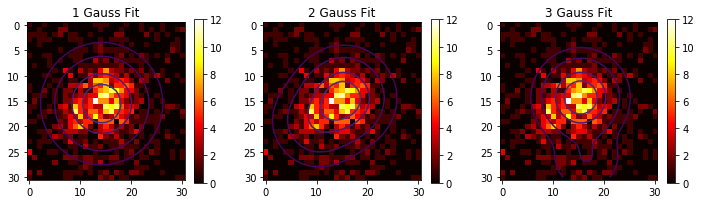

optimised 1 Gauss fit is: 
[15.508 14.217  6.915  4.211  1.     0.38  16.    16.     9.    17.
 10.     5.     4.     0.     0.     1.     0.     0.779]

optimised 2 Gauss fit is: 
[14.424 15.328  6.888  3.597  1.     0.394 18.889 10.416  2.427 17.
 10.     5.     4.     0.     0.     1.     1.     0.758]

optimised 3 Gauss fit is: 
[14.284 15.447  7.213  3.475  1.     0.357 26.006 16.591  0.66  18.38
  9.972  2.629  4.     0.     0.     1.     2.     0.743]

isSignificantlyLower : [ True False False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.779 0.758 0.743]
fullfills all conditions[ True False False]


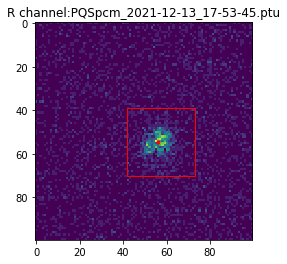

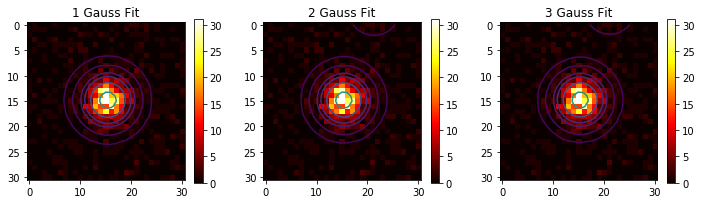

optimised 1 Gauss fit is: 
[14.805 15.43  24.413  2.486  1.     0.436  0.    21.     2.    22.
 30.     1.     4.     0.     0.     1.     0.     0.743]

optimised 2 Gauss fit is: 
[14.796 15.348 24.457  2.453  1.     0.429 -3.02  21.293  0.602 22.
 30.     1.     1.     0.     0.     1.     1.     0.755]

optimised 3 Gauss fit is: 
[14.782 15.348 24.397  2.451  1.     0.421 -3.203 21.206  0.649 22.154
 31.015  0.213  1.     0.     0.     1.     2.     0.757]

isSignificantlyLower : [ True False False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True False False]
2I* : [0.743 0.755 0.757]
fullfills all conditions[ True False False]


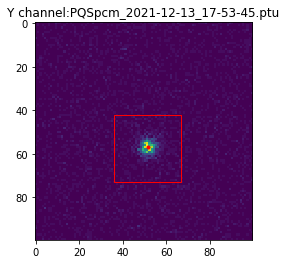

analysing image no. 1
loading file PQSpcm_2021-12-13_17-54-08.ptu
number of records is 123683


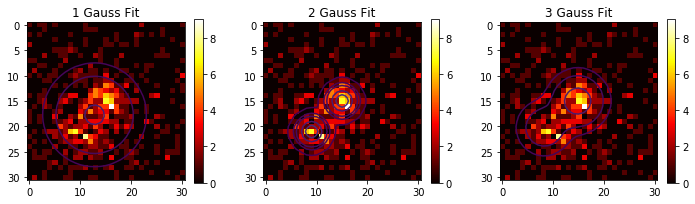

optimised 1 Gauss fit is: 
[17.721 12.813  3.011  4.532  1.     0.258 21.     9.     7.    22.
 11.     8.     4.     0.     0.     1.     0.     0.767]

optimised 2 Gauss fit is: 
[14.977 15.012  7.012  1.569  1.    -0.101 21.011  9.021  6.996 22.
 11.     8.    -1.     0.     0.     1.     1.     0.216]

optimised 3 Gauss fit is: 
[14.985 14.892  4.393  2.576  1.     0.312 20.259  8.276  1.815 22.36
 12.043  1.821  4.     0.     0.     1.     2.     0.711]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True False  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.767 0.216 0.711]
fullfills all conditions[ True False False]


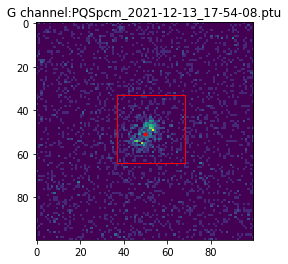

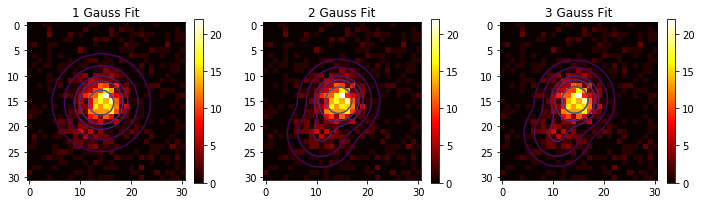

optimised 1 Gauss fit is: 
[15.325 14.109 14.104  2.823  1.     0.454 21.    10.     7.    21.
 20.     3.     4.     0.     0.     1.     0.     0.85 ]

optimised 2 Gauss fit is: 
[14.787 14.388 16.777  2.442  1.     0.413 21.404 10.874  3.134 21.
 20.     3.     4.     0.     0.     1.     1.     0.761]

optimised 3 Gauss fit is: 
[14.753 14.365 17.03   2.415  1.     0.402 21.38  10.798  3.211 20.662
 19.493  0.414  4.     0.     0.     1.     2.     0.758]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [0.85  0.761 0.758]
fullfills all conditions[ True  True False]


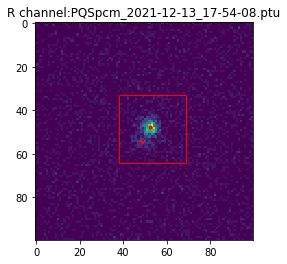

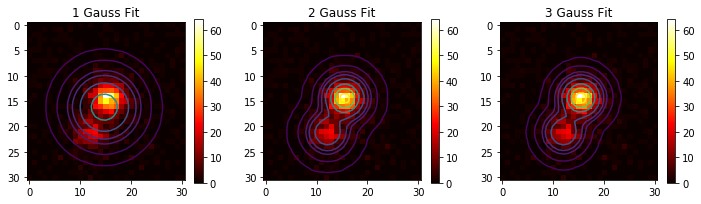

optimised 1 Gauss fit is: 
[16.206 14.724 26.504  3.331  1.     0.425 21.    12.    21.    24.
 24.     4.     4.     0.     0.     1.     0.     1.274]

optimised 2 Gauss fit is: 
[14.412 15.548 44.794  2.126  1.     0.48  21.176 12.134 18.383 24.
 24.     4.     1.     0.     0.     1.     1.     0.772]

optimised 3 Gauss fit is: 
[14.356 15.502 45.924  2.085  1.     0.455 21.168 12.06  18.94  19.752
 19.634  1.732  4.     0.     0.     1.     2.     0.752]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [1.274 0.772 0.752]
fullfills all conditions[ True  True False]


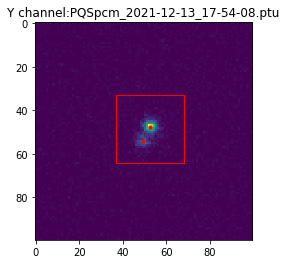

analysing image no. 2
loading file PQSpcm_2021-12-13_17-54-30.ptu
number of records is 129523


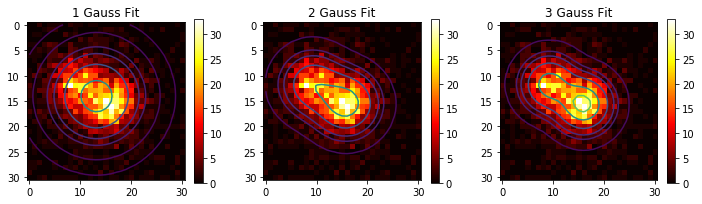

optimised 1 Gauss fit is: 
[14.031 13.18  24.619  4.546  1.     0.425 12.     9.    25.    13.
  0.     2.     4.     0.     0.     1.     0.     0.96 ]

optimised 2 Gauss fit is: 
[15.505 15.788 24.618  3.435  1.     0.568 11.72   9.18  16.601 13.
  0.     2.     4.     0.     0.     1.     1.     0.765]

optimised 3 Gauss fit is: 
[1.564e+01 1.600e+01 3.292e+01 2.973e+00 1.000e+00 6.503e-01 1.172e+01
 9.303e+00 2.491e+01 1.292e+01 2.075e-07 1.970e+00 2.000e+00 0.000e+00
 0.000e+00 1.000e+00 2.000e+00 2.180e-01]

isSignificantlyLower : [ True  True  True]
isNoJunkIstar : [ True  True False]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.96  0.765 0.218]
fullfills all conditions[ True  True False]


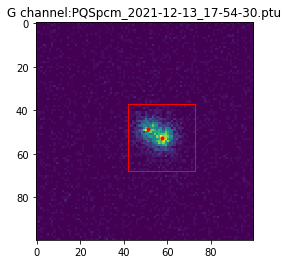

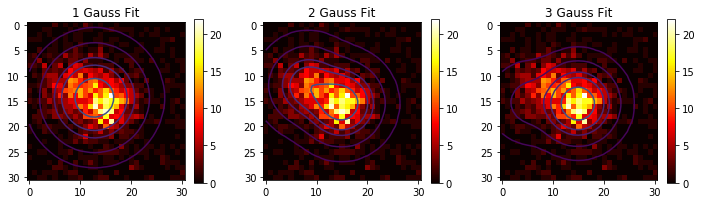

optimised 1 Gauss fit is: 
[14.36  12.769 14.346  4.249  1.     0.424 13.    10.    14.     6.
 13.     2.     4.     0.     0.     1.     0.     0.862]

optimised 2 Gauss fit is: 
[15.463 14.879 15.391  3.299  1.     0.462 11.905  8.257  7.881  6.
 13.     2.     4.     0.     0.     1.     1.     0.732]

optimised 3 Gauss fit is: 
[15.511 14.924 15.893  3.224  1.     0.456 15.296  5.476  1.061 11.498
  8.624  7.509  4.     0.     0.     1.     2.     0.728]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.862 0.732 0.728]
fullfills all conditions[ True  True False]


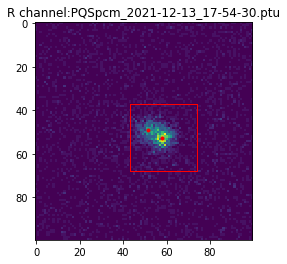

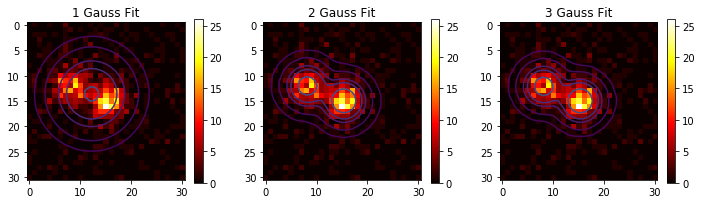

optimised 1 Gauss fit is: 
[13.576 12.242 10.39   3.923  1.     0.329 12.     9.    19.     5.
  7.     3.     4.     0.     0.     1.     0.     1.096]

optimised 2 Gauss fit is: 
[14.967 15.38  17.253  2.163  1.     0.425 12.013  8.136 13.741  5.
  7.     3.     4.     0.     0.     1.     1.     0.783]

optimised 3 Gauss fit is: 
[14.966 15.387 17.53   2.147  1.     0.409 12.103  8.137 13.772  5.387
  7.967  0.716  4.     0.     0.     1.     2.     0.776]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [1.096 0.783 0.776]
fullfills all conditions[ True  True False]


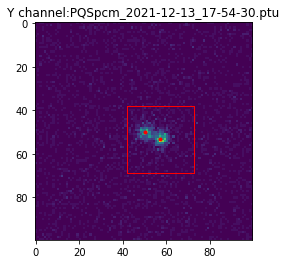

analysing image no. 3
loading file PQSpcm_2021-12-13_17-54-52.ptu
number of records is 132227


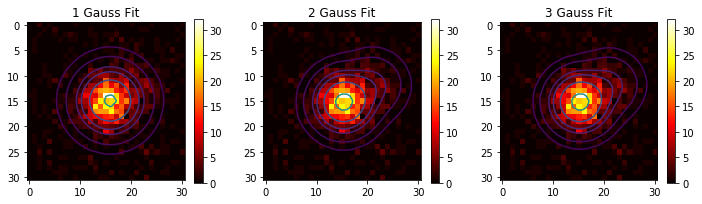

optimised 1 Gauss fit is: 
[14.911 15.876 21.017  3.24   1.     0.384 12.    23.     7.    25.
 23.     4.     4.     0.     0.     1.     0.     0.797]

optimised 2 Gauss fit is: 
[15.234 15.303 22.904  2.918  1.     0.362 11.862 21.182  3.4   25.
 23.     4.     4.     0.     0.     1.     1.     0.734]

optimised 3 Gauss fit is: 
[15.227 15.282 22.97   2.916  1.     0.334 11.823 21.196  3.485 24.576
 22.709  0.395  4.     0.     0.     1.     2.     0.727]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [0.797 0.734 0.727]
fullfills all conditions[ True  True False]


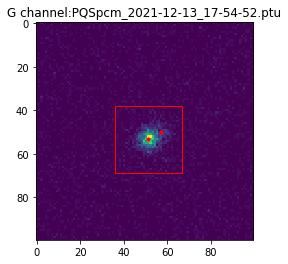

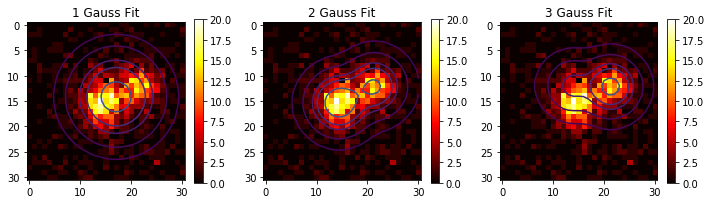

optimised 1 Gauss fit is: 
[14.153 17.047 12.588  4.063  1.     0.367 12.    21.    13.    24.
 16.     4.     4.     0.     0.     1.     0.     0.951]

optimised 2 Gauss fit is: 
[15.373 14.393 16.193  2.694  1.     0.449 12.11  21.329 10.688 24.
 16.     4.     4.     0.     0.     1.     1.     0.748]

optimised 3 Gauss fit is: 
[11.978 13.817  3.412  2.524  1.     0.448 12.158 21.372 12.016 16.007
 14.465 15.214  4.     0.     0.     1.     2.     0.738]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.951 0.748 0.738]
fullfills all conditions[ True  True False]


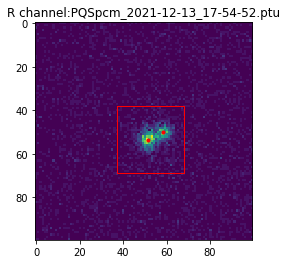

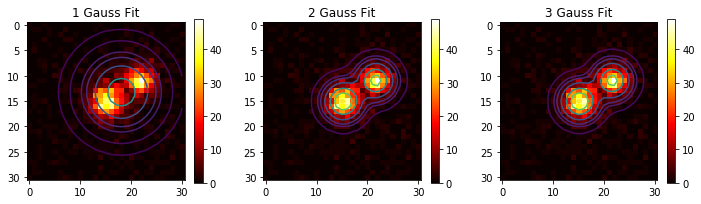

optimised 1 Gauss fit is: 
[13.247 18.085 25.812  3.656  1.     0.412 11.    22.    49.    22.
 27.     3.     4.     0.     0.     1.     0.     1.494]

optimised 2 Gauss fit is: 
[15.076 15.221 41.206  2.082  1.     0.54  10.95  21.664 33.782 22.
 27.     3.     4.     0.     0.     1.     1.     0.802]

optimised 3 Gauss fit is: 
[15.075 15.219 41.092  2.088  1.     0.519 10.945 21.665 33.683 20.784
 25.935  0.545  4.     0.     0.     1.     2.     0.797]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [1.494 0.802 0.797]
fullfills all conditions[ True  True False]


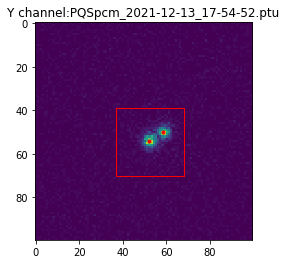

analysing image no. 4
loading file PQSpcm_2021-12-13_17-55-14.ptu
number of records is 134240


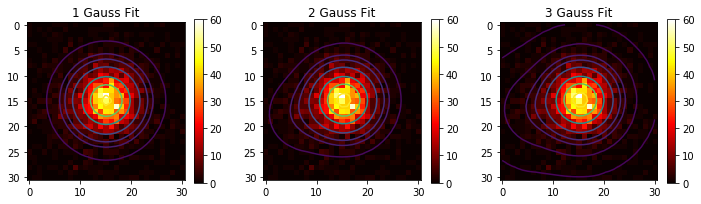

optimised 1 Gauss fit is: 
[14.906 15.103 40.899  3.855  1.     0.576  9.     5.     3.    28.
  9.     6.     1.     0.     0.     1.     0.     0.864]

optimised 2 Gauss fit is: 
[14.799 15.404 42.202  3.712  1.     0.529 17.543  7.547  2.471 28.
  9.     6.     1.     0.     0.     1.     1.     0.826]

optimised 3 Gauss fit is: 
[14.757 15.429 42.664  3.685  1.     0.49  16.649  6.993  2.348 23.899
 11.709  0.794  4.     0.     0.     1.     2.     0.82 ]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.864 0.826 0.82 ]
fullfills all conditions[ True  True False]


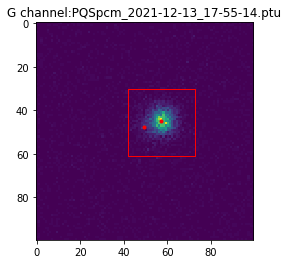

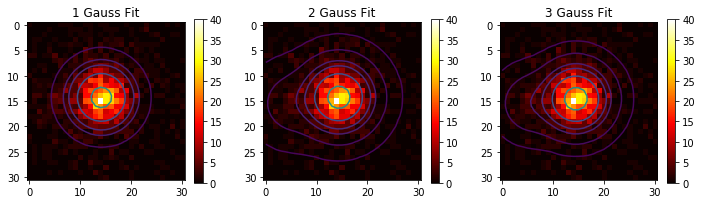

optimised 1 Gauss fit is: 
[14.289 14.133 23.049  3.523  1.     0.513  7.     6.     3.     4.
 17.     2.     4.     0.     0.     1.     0.     0.795]

optimised 2 Gauss fit is: 
[14.26  14.399 24.172  3.376  1.     0.473 15.463  5.324  1.526  4.
 17.     2.     4.     0.     0.     1.     1.     0.76 ]

optimised 3 Gauss fit is: 
[14.546 14.536 24.965  3.211  1.     0.448 15.452  5.859  2.047  7.735
 13.149  1.747  4.     0.     0.     1.     2.     0.744]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True  True]
2I* : [0.795 0.76  0.744]
fullfills all conditions[ True  True False]


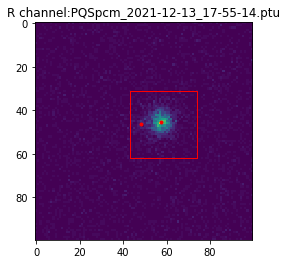

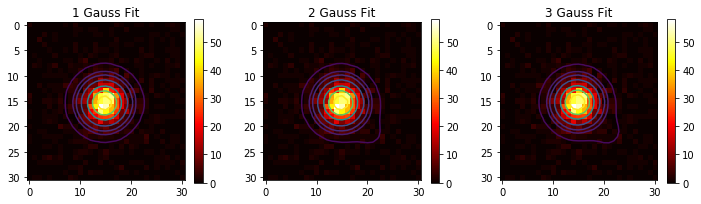

optimised 1 Gauss fit is: 
[15.385 14.757 46.151  2.538  1.     0.547 22.    23.     4.    25.
 15.     3.     4.     0.     0.     1.     0.     0.835]

optimised 2 Gauss fit is: 
[15.366 14.739 46.506  2.525  1.     0.529 21.407 20.68   0.571 25.
 15.     3.     1.     0.     0.     1.     1.     0.828]

optimised 3 Gauss fit is: 
[15.255 14.785 47.912  2.456  1.     0.507 21.047 20.773  0.718 21.145
 12.173  1.693  4.     0.     0.     1.     2.     0.813]

isSignificantlyLower : [ True False False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True False False]
2I* : [0.835 0.828 0.813]
fullfills all conditions[ True False False]


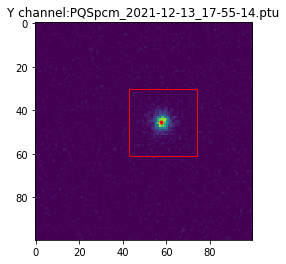

analysing image no. 5
loading file PQSpcm_2021-12-13_17-55-37.ptu
number of records is 132022


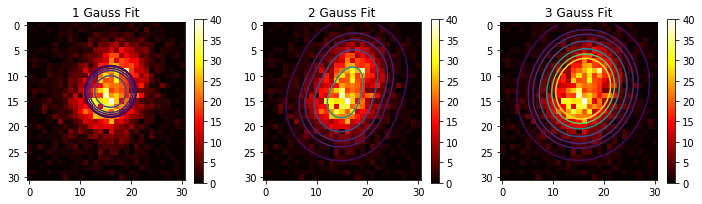

optimised 1 Gauss fit is: 
[ 13.124  15.935  36.961   4.336   1.    -18.455   9.     17.     31.
  16.      4.      2.     -1.      0.      0.      1.      0.     -1.065]

optimised 2 Gauss fit is: 
[15.954 14.7   22.598  3.816  1.     0.559  9.266 17.412 17.737 16.
  4.     2.     4.     0.     0.     1.     1.     0.765]

optimised 3 Gauss fit is: 
[ 14.578  15.125  54.43    3.853   1.      0.569  10.788  16.657  60.144
  12.37   15.951 -75.133   1.      0.      0.      1.      2.      0.763]

isSignificantlyLower : [ True False False]
isNoJunkIstar : [False  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [-1.065  0.765  0.763]
fullfills all conditions[False False False]


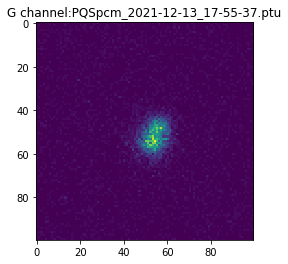

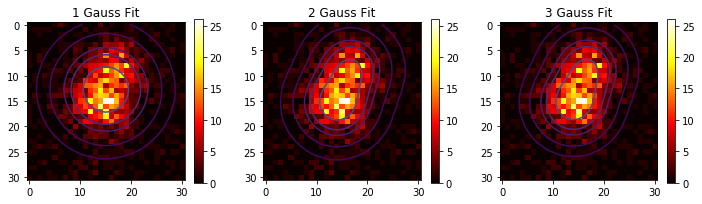

optimised 1 Gauss fit is: 
[12.728 15.03  16.545  4.273  1.     0.393  9.    17.    16.    26.
 13.     1.     4.     0.     0.     1.     0.     0.928]

optimised 2 Gauss fit is: 
[15.389 14.021 15.714  3.328  1.     0.439  8.745 16.634 10.907 26.
 13.     1.     4.     0.     0.     1.     1.     0.786]

optimised 3 Gauss fit is: 
[15.295 14.017 15.857  3.335  1.     0.396  8.686 16.674 10.799 27.151
 13.874  0.537  4.     0.     0.     1.     2.     0.775]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True  True False]
2I* : [0.928 0.786 0.775]
fullfills all conditions[ True  True False]


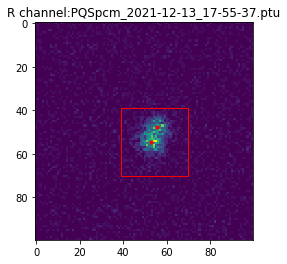

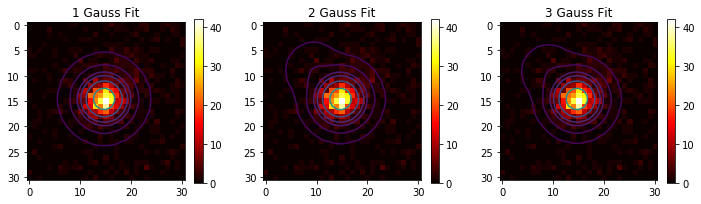

optimised 1 Gauss fit is: 
[14.582 14.69  29.333  2.359  1.     0.481  8.    10.     1.     0.
 16.     3.     4.     0.     0.     1.     0.     0.835]

optimised 2 Gauss fit is: 
[14.604 14.705 29.726  2.338  1.     0.469  8.959  9.404  0.47   0.
 16.     3.     4.     0.     0.     1.     1.     0.831]

optimised 3 Gauss fit is: 
[14.595 14.703 29.494  2.347  1.     0.465  9.204  9.127  0.434 -7.638
 28.242  0.096  1.     0.     0.     1.     2.     0.835]

isSignificantlyLower : [ True False False]
isNoJunkIstar : [ True  True  True]
isNoGarbagePeaks : [ True False False]
2I* : [0.835 0.831 0.835]
fullfills all conditions[ True False False]


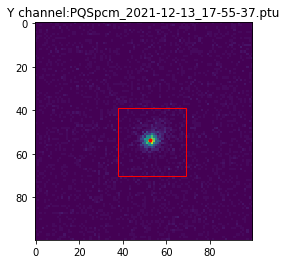

analysing image no. 6
loading file PQSpcm_2021-12-13_17-55-59.ptu
number of records is 117186


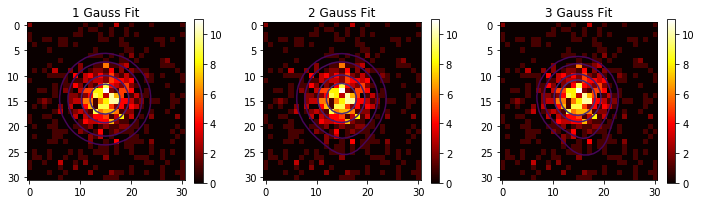

optimised 1 Gauss fit is: 
[14.624 14.867  6.883  3.42   1.     0.273 23.    17.     4.    30.
 16.     1.     4.     0.     0.     1.     0.     0.68 ]

optimised 2 Gauss fit is: 
[14.484 14.857  6.991  3.361  1.     0.263 23.039 15.674  0.269 30.
 16.     1.     4.     0.     0.     1.     1.     0.677]

optimised 3 Gauss fit is: 
[14.282 14.828  9.637  2.874  1.     0.291 21.535 16.479  0.56  30.434
 16.013 -0.775  1.     0.     0.     1.     2.       nan]

isSignificantlyLower : [ True False False]
isNoJunkIstar : [ True  True False]
isNoGarbagePeaks : [ True False False]
2I* : [0.68  0.677   nan]
fullfills all conditions[ True False False]


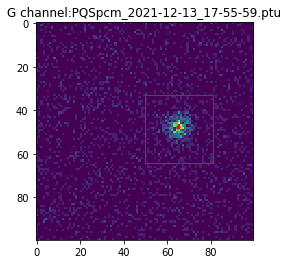

K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:315: UserWarning: No contour levels were found within the data range.
  dtype = np.double))


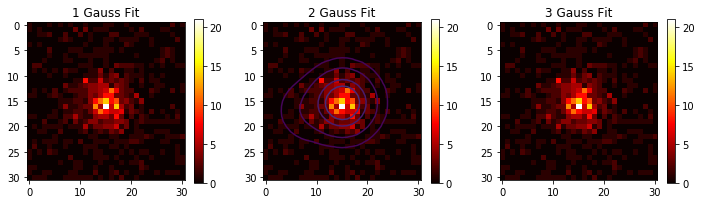

optimised 1 Gauss fit is: 
[-1.459e+11 -5.929e+10 -2.442e+12  2.254e+11  1.000e+00 -2.504e+10
  1.800e+01  9.000e+00  5.000e+00  6.000e+00  2.700e+01  2.000e+00
 -1.000e+00  0.000e+00  0.000e+00  1.000e+00  0.000e+00        nan]

optimised 2 Gauss fit is: 
[15.348 15.17   8.558  2.943  1.     0.397 16.875  8.547  0.583  6.
 27.     2.     4.     0.     0.     1.     1.     0.722]

optimised 3 Gauss fit is: 
[-1.230e+10 -1.668e+10 -6.150e+10  3.699e+09  1.000e+00  2.136e+09
 -4.690e+10  5.760e+10 -1.051e+11 -1.026e+09  4.664e+09 -1.587e+11
 -1.000e+00  0.000e+00  0.000e+00  1.000e+00  2.000e+00        nan]

isSignificantlyLower : [ True  True False]
isNoJunkIstar : [False  True False]
isNoGarbagePeaks : [False False False]
2I* : [  nan 0.722   nan]
fullfills all conditions[False False False]


KeyboardInterrupt: 

In [4]:
#the tcspc tac number for gating away the initial part of the STED decay.
gate = 16
#set to True to obtain visual plots to monitor the fitting manually
#set to False for quicker analysis
verbose = True
#don't change below settings
outname = os.path.join(resdir, identifier + '.spots')
options = df.GAP.optionsCluster(fitbg = 0, setbg = 0.2)
files = os.listdir(wdir)
locLst = df.analyseDir(options, wdir, files, Ggate = gate, Rgate = gate, Ygate = gate,
                             outname = outname, framestop = -1, ROIsize = 30, verbose = verbose,
                        junkIstar = 0.30, garbageBrightness = 50, DTwoIstar = 0.03)
CLR3D_27Okt = locLst

### 2nd analysis step: FRET information

In [5]:
#
locfile = os.path.join(resdir, identifier  + '.spots')
anfile = os.path.join(resdir, identifier + '_an.spots')
load = False
if not load:
    ntacs = 256
    outname = os.path.join(resdir, identifier + '_an.spots')
    TACout = os.path.join(resdir, identifier + '_all_PS.dat')
    statsout = os.path.join(resdir, identifier + '.pg4')

    locLst_an = df.analyseLocLst(locLst, Igate = [0,0,0], ltgate = [gate, gate, gate],
                                    verbose = False, framestop = 20, outname = outname,
                                    ntacs = ntacs, bgphotons = [3.7, 4.7, 4.9])
    posdir = os.path.join(resdir, 'positions')
    df.export_position(locLst, posdir)
    #an data contains always the full TCSPC decay
    df.subensembleTAC(locLst_an, ntacs = ntacs, outfile = TACout)
    stats = df.genStats(locLst_an, outfile = statsout, isforMargarita = True)
CLR3D_27Okt = locLst
CLR3D_27Okt_an = locLst_an
CLR3D_27Okt_stats = stats

loading file PQSpcm_2021-12-13_18-34-45.ptu
number of records is 128001
analysing localisation 0
loading file PQSpcm_2021-12-13_18-35-07.ptu
number of records is 129480
analysing localisation 0
loading file PQSpcm_2021-12-13_18-35-30.ptu
number of records is 124368
analysing localisation 1
loading file PQSpcm_2021-12-13_18-35-52.ptu
number of records is 120461
analysing localisation 2
loading file PQSpcm_2021-12-13_18-36-14.ptu
number of records is 119972
analysing localisation 2
loading file PQSpcm_2021-12-13_18-36-37.ptu
number of records is 112149
analysing localisation 3
loading file PQSpcm_2021-12-13_18-37-00.ptu
number of records is 136654
analysing localisation 5
loading file PQSpcm_2021-12-13_18-37-22.ptu
number of records is 124710
analysing localisation 7
loading file PQSpcm_2021-12-13_18-37-45.ptu
number of records is 124024
analysing localisation 9
loading file PQSpcm_2021-12-13_18-38-08.ptu
number of records is 122590
analysing localisation 11
loading file PQSpcm_2021-12-1

KeyboardInterrupt: 

# 4) Visualize

### spot stoichiometry

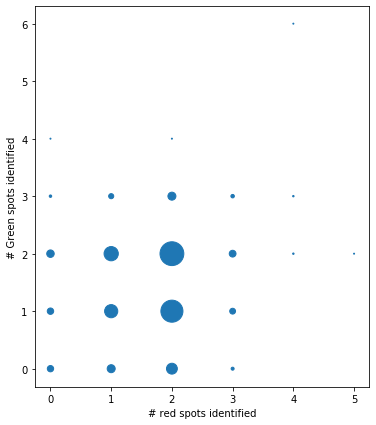

array([[ 40,  64, 118,   9,   0,   0],
       [ 41, 173, 486,  34,   0,   0],
       [ 56, 203, 567,  46,   2,   1],
       [  6,  26,  64,  12,   2,   0],
       [  1,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0]])

In [6]:
#here you can get an idea about the number of Donor Only, Acceptor only and degree of labelling
df.plotOccurence(locLst)

### E vs Tau plot

mean Green lifetime for CLR-3D 27 Okt is 3.0
mean Red lifetime for CLR-3D 27 Okt is 3.4
mean Yellow lifetime for CLR-3D 27 Okt is 3.2


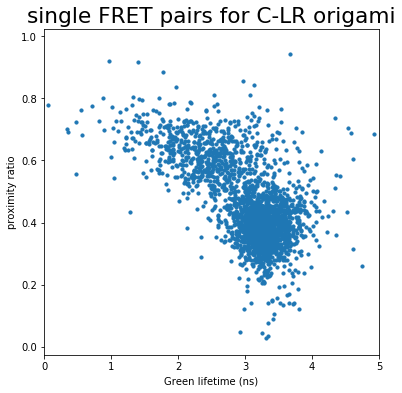

In [11]:
tauG = df.getFRETind(locLst_an, 'tauG')
tauR = df.getFRETind(locLst_an, 'tauR')
tauY = df.getFRETind(locLst_an, 'tauY')
Eprox = df.getFRETind(locLst_an, 'proxRatio')
sample = 'CLR-3D 27 Okt'
plt.figure(figsize = (6,6))
plt.scatter(tauG, Eprox, s = 10)
mpl.rcParams.update({'font.size': 18})
plt.xlabel('Green lifetime (ns)')
plt.ylabel('proximity ratio')
plt.title('single FRET pairs for C-LR origami')
plt.xlim(0,5)
print('mean Green lifetime for %s is %.1f' %(sample, np.mean(tauG)))
print('mean Red lifetime for %s is %.1f' %(sample, np.mean(tauR)))
print('mean Yellow lifetime for %s is %.1f' %(sample, np.mean(tauY)))
#plt.savefig(os.path.join(outdir, 'C-LR_super_super_res.png'), dpi = 300, bbox_inches = 'tight')

# 5) Acceptor-Acceptor distance

### function

In [12]:
def getAAdist(AAlocLst, pxSize = 10):
    """assumes all locs have exactly two acceptors"""
    AAdist = []
    for loc in AAlocLst:
        Rdist = df. getCoordFromSpot(loc['Y'].spotLst[0]) - \
            df.getCoordFromSpot(loc['Y'].spotLst[1])
        AAdist.append(Rdist)
    AAdist = np.array(AAdist) * pxSize
    return AAdist

### settings

In [13]:
#set the maximum distance you'd like to plot
maxdist = 120
#set the binwidth for histogramming the data
binwidth = 2
#this helps you to recognize your fit later
fitIdentifier = 'AAdist'

### XY scatter diagram

center of dataset is 4.07, 2.28 (x,y)


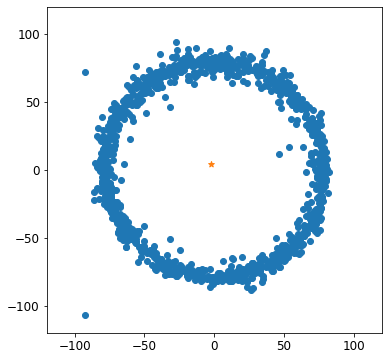

In [14]:
#the diagram is symmetric because the orientation of the molecular assembly on the surface is also random
##leave as-is
# get the data and filter
slocLst = df.selectSpotOccurence(locLst_an, [0,1,2], [2])

#settings global to nc Chi fits
mpl.rcParams['font.size'] = 12
# plot the xy scatter data
#this is not generic, make into something generic
dist = getAAdist(slocLst)
plt.figure(figsize = (6,6))
plt.scatter(-dist[:,1], dist[:,0])
plt.xlim(-maxdist,maxdist)
plt.ylim(-maxdist,maxdist)

center = np.mean(dist, axis = 0)
plt.scatter(-center[1], center[0], marker = '*')#, color = 'orange')
print('center of dataset is %.2f, %.2f (x,y)' % (center[0], center[1]))
plt.show()


### create a histogram

In [15]:
#get the absolute distance
distnorm = np.linalg.norm(dist, axis = 1)
# bin the data
counts, bin_edges, _ = plt.hist(distnorm, bins = np.arange(0, maxdist, binwidth))
plt.clf()
Nbins = bin_edges.shape[0] - 1
bincenters = np.zeros(Nbins)
for i in range(Nbins):
    bincenters[i] = (bin_edges[i] + bin_edges[i + 1]) / 2

<Figure size 432x288 with 0 Axes>

### non-centered chi Fit

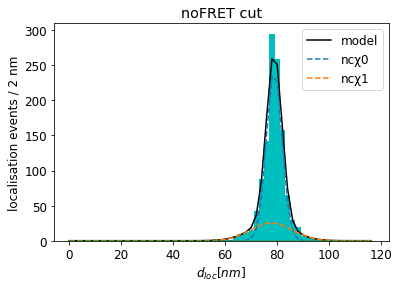

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1173
    # data points      = 1
    # variables        = 6
    chi-square         = 5131.15526
    reduced chi-square = 5131.15526
    Akaike info crit   = 20.5430861
    Bayesian info crit = 8.54308611
##  Warning: uncertainties could not be estimated:
[[Variables]]
    bg:    0 (fixed)
    mu0:   78.8077190 (init = 75)
    A0:    1822.16549 (init = 500)
    sig0:  2.98069314 (init = 3)
    mu1:   77.3580462 (init = 50)
    A1:    505.826250 (init = 100)
    sig1:  8.00678946 (init = 5)
AIC for custom fit is 155.26


In [16]:
# set your fit settings here
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 75)
p['sig0'].set(vary = True, value = 3)
p['A0'].set(vary = True, value = 500)
p['mu1'].set(vary = True, value = 50)
p['sig1'].set(vary = True, value = 5)
p['A1'].set(vary = True, value = 100)
#p['mu2'].set(vary = False, value = 82)
#p['sig2'].set(vary = False, value = 3)
#p['A2'].set(vary = True, value = 500)
fitres, AIC, *_ = hfit.fitDistr(p, hfit.NncChidistr, bincenters, counts)
plt.figure(figsize = (6, 4))
hfit.plotdistr(distnorm, bincenters, fit = fitres, title = 'noFRET cut', )
                           #modelout = modelout, plotout = plotout)
print(fit_report(fitres))
print('AIC for custom fit is %.2f' % AIC)

### Support plane

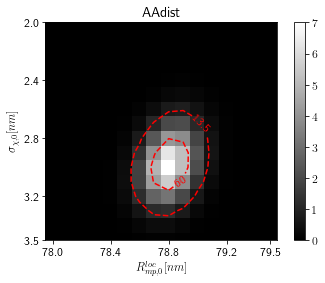

In [23]:
#once you've created your support plane surface, you may re-load it.
load = False
#set the parameters you'd like to scan
param_ranges={"sig0":np.arange(2, 3.6, .1),"mu0":np.arange(78,79.6, .1)}
#set these settings the same as your optimal fit
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 78)
p['sig0'].set(vary = True, value = 5)
p['A0'].set(vary = True, value = 859)
p['mu1'].set(vary = True, value = 67)
p['sig1'].set(vary = True, value = 14)
p['A1'].set(vary = True, value = 594)
#p['mu2'].set(vary = True, value = 43)
#p['sig2'].set(vary = True, value = 22)
#p['A2'].set(vary = True, value = 212)

surfaceout = os.path.join(resdir, fitIdentifier + 'surface.txt')
if load:
    surface = np.genfromtxt(surfaceout)
else: 
    surface = hfit.scanLikelihoodSurface(param_ranges, p, bincenters, counts, verbose = False)
    np.savetxt(surfaceout, surface)    

outname = os.path.join(resdir, fitIdentifier + 'supportplane.png')
hfit.plotLikelihoodSurface(surface, param_ranges, outname = outname, title =fitIdentifier, skip = 4,
                        figsize = (6, 4), isplotpdf = True)

# 6) no FRET distance analysis

### settings and filter settings

In [24]:
# we want to isolate the noFRET species using these selection criteria
# we want to include as many potential FRET pairs as possible, so we include partially labelled structures
slocLst = df.selectSpotOccurence(locLst_an, [1, 2], [1, 2])
# select based pseudo-efficiency or proximity FRET
# note: start from 0.01 to exclude incomplete pairs
slocLst = df.filterFRETind(slocLst, 'proxRatio', 0.01, 0.4)
# select on the green fluorescent lifetime (ns)
slocLst = df.filterFRETind(slocLst, 'tauG', 2.5, 3.5)
# select only spots that have a minumum amount of photons
slocLst = df.filterFRETind(slocLst, 'NG', 150, 1e8)
slocLst = df.filterFRETind(slocLst, 'NY', 150, 1e8)

# for exporting a sub-ensemble lifetime decay, we additionally 
# select on the localisation-based donor-acceptor distance
tcspclocLst = df.filterFRETind(slocLst, 'dist', 10, 25)

#set identifier, max distance and binwidth as before
fitIdentifier = 'NFdist'
maxdist = 40
binwidth = 1

### make scatter plot

P:\STED-FRET3D\02_data\211213_DNA_origami_CLR_Al594At643_MR\analysis
5.0 nm in x and 0.0 nm in y subtracted
center of dataset is 2.60, -1.29 (x,y)


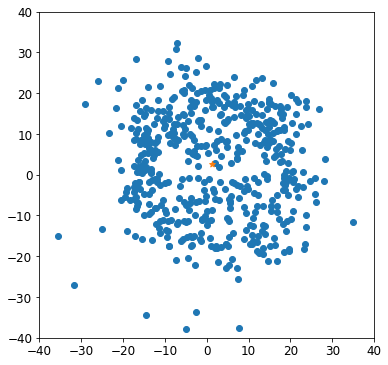

In [25]:
TACout = os.path.join(resdir, identifier + '_NF_P+S_0.txt')
df.subensembleTAC(tcspclocLst, outfile = TACout)

#settings global to nc Chi fits
mpl.rcParams['font.size'] = 12

# plot the xy scatter data
distx = df.getFRETind(slocLst, 'distx')
disty = df.getFRETind(slocLst, 'disty')
dist = np.array((distx, disty)).transpose()
dist = df.filterVec(dist, maxval = maxdist, center = (5, 0))
#dist = df.filterVec(dist, maxval = maxdist)

plt.figure(figsize = (6,6))
plt.scatter(-dist[:,1], dist[:,0])
plt.xlim(-maxdist,maxdist)
plt.ylim(-maxdist,maxdist)

center = np.mean(dist, axis = 0)
plt.scatter(-center[1], center[0], marker = '*')#, color = 'orange')
print('center of dataset is %.2f, %.2f (x,y)' % (center[0], center[1]))
plt.show()


### make histogram

In [26]:
#get the absolute distance
distnorm = np.linalg.norm(dist, axis = 1)
# bin the data
#need to change to using numpy  hist
counts, bin_edges, _ = plt.hist(distnorm, bins = np.arange(0, maxdist, binwidth))
plt.clf()
Nbins = bin_edges.shape[0] - 1
bincenters = np.zeros(Nbins)
for i in range(Nbins):
    bincenters[i] = (bin_edges[i] + bin_edges[i + 1]) / 2

<Figure size 432x288 with 0 Axes>

### non-centered chi Fit

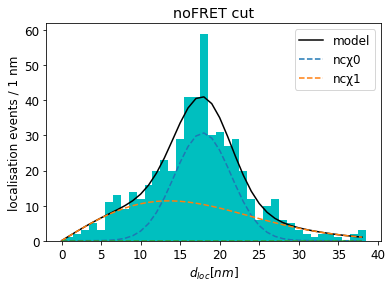

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 347
    # data points      = 1
    # variables        = 6
    chi-square         = 8507.50574
    reduced chi-square = 8507.50574
    Akaike info crit   = 21.0487041
    Bayesian info crit = 9.04870408
##  Warning: uncertainties could not be estimated:
[[Variables]]
    bg:    0 (fixed)
    mu0:   17.5046877 (init = 16)
    A0:    276.400979 (init = 100)
    sig0:  3.62886684 (init = 3)
    mu1:   0.13298581 (init = 0)
    A1:    253.542283 (init = 426)
    sig1:  13.5409541 (init = 15)
AIC for custom fit is 196.47


In [28]:
# set your fit parameters here
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 16)
p['sig0'].set(vary = True, value = 3)
p['A0'].set(vary = True, value = 100)
p['mu1'].set(vary = True, value = 0)
p['sig1'].set(vary = True, value = 15)
p['A1'].set(vary = True, value = 426)
#p['mu2'].set(vary = True, value = 82)
#p['sig2'].set(vary = True, value = 5)
fitres, AIC, *_ = hfit.fitDistr(p, hfit.NncChidistr, bincenters, counts)
plt.figure(figsize = (6, 4))
hfit.plotdistr(distnorm, bincenters, fit = fitres, title = 'noFRET cut', )
                           #modelout = modelout, plotout = plotout)
print(fit_report(fitres))
print('AIC for custom fit is %.2f' % AIC)

### Support plane

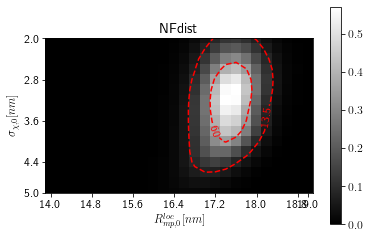

In [31]:
#once you've created your support plane, you may re-load it.
load = False
#set the parameters you'd like to scan
param_ranges={"sig0":np.arange(2.0,5.1,.2),"mu0":np.arange(14,19.1, .2)}
#set these settings the same as your optimal fit
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 16)
p['sig0'].set(vary = True, value = 3)
p['A0'].set(vary = True, value = 300)
p['mu1'].set(vary = True, value = 10)
p['sig1'].set(vary = True, value = 10)
p['A1'].set(vary = True, value = 333)
#p['mu2'].set(vary = True, value = 43)
#p['sig2'].set(vary = True, value = 22)
#p['A2'].set(vary = True, value = 212)

surfaceout = os.path.join(resdir, fitIdentifier + 'surface.txt')
if load:
    surface = np.genfromtxt(surfaceout)
else: 
    surface = hfit.scanLikelihoodSurface(param_ranges, p, bincenters, counts, verbose = False)
    np.savetxt(surfaceout, surface)    

outname = os.path.join(resdir, fitIdentifier + 'supportplane.png')
hfit.plotLikelihoodSurface(surface, param_ranges, outname = outname, title = fitIdentifier, skip = 4,
                        figsize = (6, 4), isplotpdf = True)

# 7) high FRET distance analysis

### settings and filter settings

In [32]:
# we want to isolate the high FRET species using these selection criteria
# we want to include as many potential FRET pairs as possible, so we include partially labelled structures
slocLst = df.selectSpotOccurence(locLst_an, [1, 2], [1, 2])
# select based pseudo-efficiency or proximity FRET
# note: start from 0.01 to exclude incomplete pairs
slocLst = df.filterFRETind(slocLst, 'proxRatio', 0.55, 0.75)
# select on the green fluorescent lifetime (ns)
slocLst = df.filterFRETind(slocLst, 'tauG', 1, 3)
# select only spots that have a minumum amount of photons
slocLst = df.filterFRETind(slocLst, 'NG', 100, 1e8)
slocLst = df.filterFRETind(slocLst, 'NY', 100, 1e8)

# for exporting a sub-ensemble lifetime decay, we additionally 
# select on the localisation-based donor-acceptor distance
tcspclocLst = df.filterFRETind(slocLst, 'dist', 0, 15)

#set identifier, max distance and binwidth as before
fitIdentifier = 'HFdist'
maxdist = 40
binwidth = 0.5

### make scatter plot

P:\STED-FRET3D\02_data\211213_DNA_origami_CLR_Al594At643_MR\analysis
5.0 nm in x and 0.0 nm in y subtracted
center of dataset is -0.43, -1.64 (x,y)


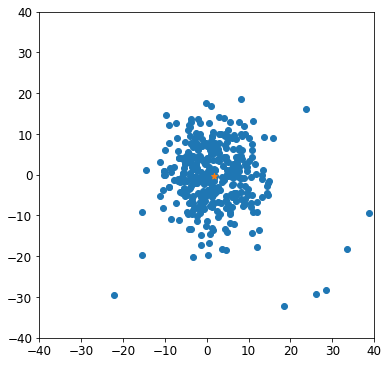

In [33]:
TACout = os.path.join(resdir, identifier + '_HF_P+S_0.txt')
df.subensembleTAC(tcspclocLst, outfile = TACout)

#settings global to nc Chi fits
mpl.rcParams['font.size'] = 12

# plot the xy scatter data
distx = df.getFRETind(slocLst, 'distx')
disty = df.getFRETind(slocLst, 'disty')
dist = np.array((distx, disty)).transpose()
dist = df.filterVec(dist, maxval = maxdist, center = (5, 0))
#dist = df.filterVec(dist, maxval = maxdist)

plt.figure(figsize = (6,6))
plt.scatter(-dist[:,1], dist[:,0])
plt.xlim(-maxdist,maxdist)
plt.ylim(-maxdist,maxdist)

center = np.mean(dist, axis = 0)
plt.scatter(-center[1], center[0], marker = '*')#, color = 'orange')
print('center of dataset is %.2f, %.2f (x,y)' % (center[0], center[1]))
plt.show()


### make histogram

In [34]:
#get the absolute distance
distnorm = np.linalg.norm(dist, axis = 1)
# bin the data
#need to change to using numpy  hist
counts, bin_edges, _ = plt.hist(distnorm, bins = np.arange(0, maxdist, binwidth))
plt.clf()
Nbins = bin_edges.shape[0] - 1
bincenters = np.zeros(Nbins)
for i in range(Nbins):
    bincenters[i] = (bin_edges[i] + bin_edges[i + 1]) / 2

<Figure size 432x288 with 0 Axes>

### non-centered chi Fit

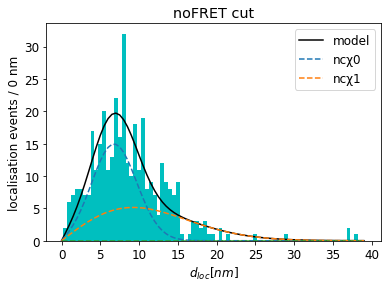

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 753
    # data points      = 1
    # variables        = 5
    chi-square         = 20078.8941
    reduced chi-square = 20078.8941
    Akaike info crit   = 19.9074245
    Bayesian info crit = 9.90742450
##  Warning: uncertainties could not be estimated:
[[Variables]]
    bg:    0 (fixed)
    mu0:   6.15931427 (init = 6)
    A0:    106.090652 (init = 100)
    sig0:  3 (fixed)
    mu1:   0.00276166 (init = 8)
    A1:    78.3935093 (init = 100)
    sig1:  9.25046722 (init = 8)
AIC for custom fit is 293.40


In [43]:
# set your fit parameters here
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 6)
p['sig0'].set(vary = False, value = 3)
p['A0'].set(vary = True, value = 100)
p['mu1'].set(vary = True, value = 8)
p['sig1'].set(vary = True, value = 8)
p['A1'].set(vary = True, value = 100)
fitres, AIC, *_ = hfit.fitDistr(p, hfit.NncChidistr, bincenters, counts)
plt.figure(figsize = (6, 4))
hfit.plotdistr(distnorm, bincenters, fit = fitres, title = 'noFRET cut', )
                           #modelout = modelout, plotout = plotout)
print(fit_report(fitres))
print('AIC for custom fit is %.2f' % AIC)

### Support plane

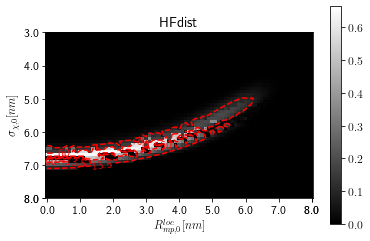

In [49]:
#once you've created your support plane, you may re-load it.
load = True
#set the parameters you'd like to scan
param_ranges={"sig0":np.arange(3.0,8.1,.1),"mu0":np.arange(0,8.1, .1)}
#set these settings the same as your optimal fit
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 6)
p['sig0'].set(vary = False, value = 3)
p['A0'].set(vary = True, value = 100)
p['mu1'].set(vary = True, value = 8)
p['sig1'].set(vary = True, value = 8)
p['A1'].set(vary = True, value = 100)

surfaceout = os.path.join(resdir, fitIdentifier + 'surface.txt')
if load:
    surface = np.genfromtxt(surfaceout)
else: 
    surface = hfit.scanLikelihoodSurface(param_ranges, p, bincenters, counts, verbose = False)
    np.savetxt(surfaceout, surface)    

outname = os.path.join(resdir, fitIdentifier + 'supportplane.png')
hfit.plotLikelihoodSurface(surface, param_ranges, outname = outname, title = fitIdentifier, skip = 10,
                        figsize = (6, 4), isplotpdf = True)

# Particle Averaging

### functions

In [52]:
def getTwoPointAngle(point1, point2):
    Dx, Dy = point2 - point1
    return np.arctan2(Dy, Dx)
def CoarseAlignPointset(EnsemblePointSet, showunflipped = False):
    EnsemblePointSet.callBatchFun('RepositionToPoint', 'A1')
    disp = EnsemblePointSet.calcAvgDisplacement(['D1', 'D2'], ['A1', 'A2'])
    print(disp)
    EnsemblePointSet.callBatchFun('applyChannelShift', ('D1', 'D2'), disp)
    #EnsemblePointSet.callBatchFun('relabelOnFRETIndicator', 'proxRatio')

    EnsemblePointSet.callBatchFun('calcAngle')
    EnsemblePointSet.callBatchFun('rotate')
    #EnsemblePointSet.callBatchFun('rotate', np.pi) #easier for my brain
    if showunflipped:
        fig = DADApointset.plotPointsets(xlim = (-20, 100))
        plt.show()
    for pointset in EnsemblePointSet.pointsets:
        #if mean y coordinate < 0, flip the structure, y has index 1
        isDonorBelowXaxis = pointset.points['D1'][1] + pointset.points['D2'][1] < 0 
        if isDonorBelowXaxis:
            pointset.mirror(mirrorAxis = 'horizontal')
    if showunflipped:
        fig = DADApointset.plotPointsets(xlim = (-20, 100))
        plt.show()

### settings

In [54]:
#set the pixel size from your measurement
pxSize = 10
#set the structure no. which should serve as an anchor
#see below for finding the best anchor
anchorstruct = 329
# set the cutoff from which deviation a molecular assembly is considered junk
RMSDcut = 0.6 # in pixels
#rotate the final structure for nice visualisation
manualAngle = 0# in radians

### Align all structures

[ 0.536 -0.146]


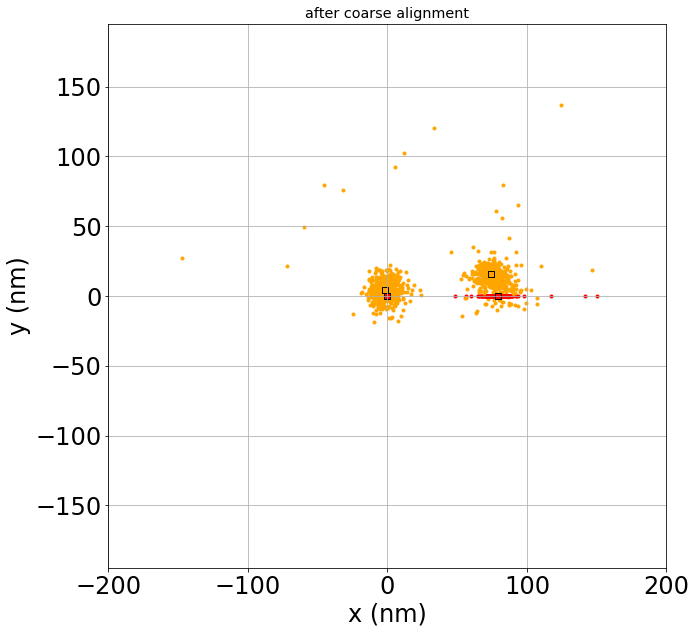

pruned 135 elements


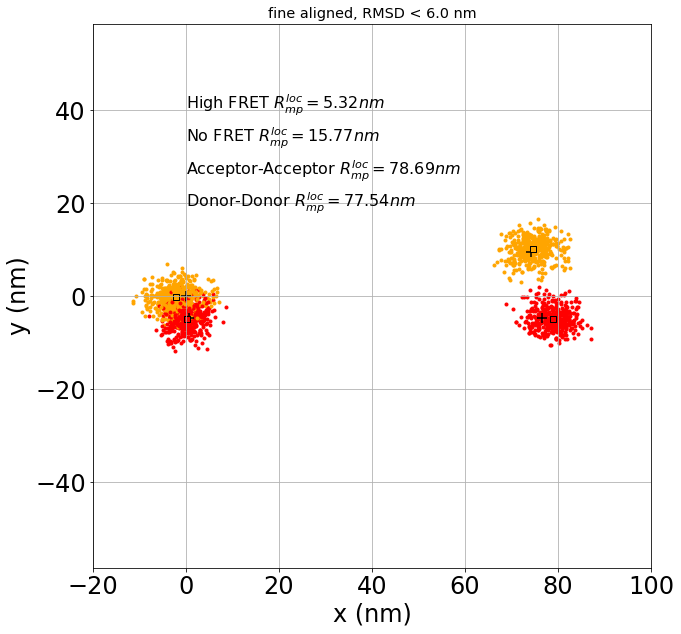

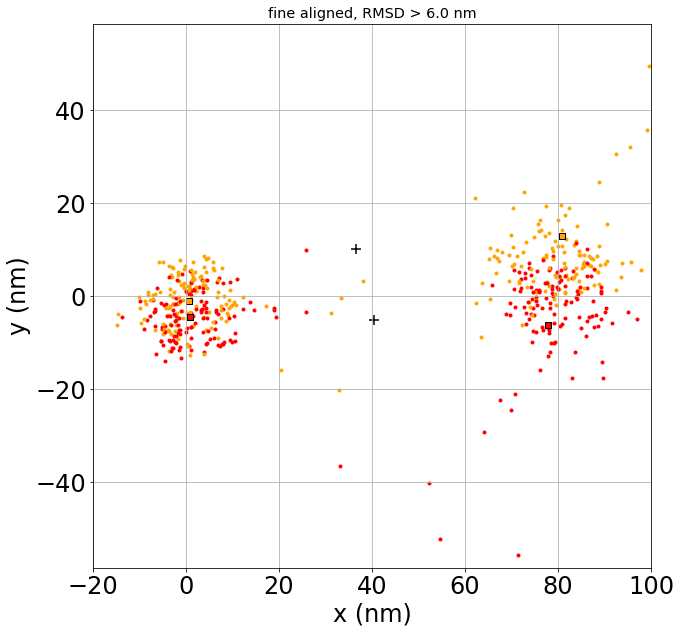

In [60]:

DADAlocLst = df.selectSpotOccurence(locLst_an, [2], [2])
DADApointset = AS.ensemblePointSet(DADAlocLst, pxSize)

CoarseAlignPointset(DADApointset, showunflipped = False)

fig = DADApointset.plotPointsets(xlim = (-200, 200))
plt.title('after coarse alignment')
plt.show()
#DADApointset.genAnchorFromModel()
DADApointset.genAnchorFromPointset(anchorstruct)
DADApointset.batchRmsd()
allscores = np.array(DADApointset.scores)


DADApointsetPruned = copy.deepcopy(DADApointset)
pruneIDs = DADApointset.pruneByScore(RMSDcut)
DADApointsetPruned.selectOnPointsetIDs(pruneIDs)
DADApointset.genAnchorFromModel(H2H = 2.4)


#set meanD1 to 0,0 and A2 to x axis for figure
pointout = np.array(DADApointset.callBatchFun('getPoints'))
meanD1, meanD2, meanA1, meanA2 = np.mean(pointout, axis = 0)
meanA1A2Angle = getTwoPointAngle(meanA1, meanA2)

#transfrom model
anchorD1 = copy.deepcopy(DADApointset.anchor.points['D1'])
DADApointset.anchor.applyChannelShift(['D1', 'D2', 'A1', 'A2'], anchorD1)
modelA1A2Angle = getTwoPointAngle(DADApointset.anchor.points['A1'], DADApointset.anchor.points['A2'])
DADApointset.anchor.rotate(angle = modelA1A2Angle - manualAngle)
CMmodel = np.mean(np.array([x for x in DADApointset.anchor.points.values()]), axis = 0)

#transfrom data
DADApointset.callBatchFun('rotate', angle = meanA1A2Angle - manualAngle)
DADApointset.callBatchFun('applyChannelShift', ['D1', 'D2', 'A1', 'A2'], -CMmodel)
pointout = np.array(DADApointset.callBatchFun('getPoints'))
meanpositions = np.mean(pointout, axis = 0)
meanstds = np.std(pointout, axis = 0)

#transform pruned data
DADApointsetPruned.callBatchFun('applyChannelShift', ['D1', 'D2', 'A1', 'A2'], meanD1)
DADApointsetPruned.callBatchFun('rotate', angle = meanA1A2Angle + manualAngle)


#plot
fig = DADApointset.plotPointsets(xlim = (-20, 100))
plt.title('fine aligned, RMSD < %.1f nm' % (RMSDcut * pxSize))
D1A1mean = np.linalg.norm(meanpositions[2] - meanpositions[0]) * pxSize
D2A2mean = np.linalg.norm(meanpositions[3] - meanpositions[1]) * pxSize
DDmean = np.linalg.norm(meanpositions[1] - meanpositions[0]) * pxSize
AAmean = np.linalg.norm(meanpositions[3] - meanpositions[2]) * pxSize
ax = fig.gca()
ax.text(0,40,'High FRET $R_{mp}^{loc} = %.2f nm$' % D1A1mean, fontsize = 16)
ax.text(0,33,'No FRET $R_{mp}^{loc} = %.2f nm$' % D2A2mean, fontsize = 16)
ax.text(0,26,'Acceptor-Acceptor $R_{mp}^{loc} = %.2f nm$' % AAmean, fontsize = 16)
ax.text(0,19,'Donor-Donor $R_{mp}^{loc} = %.2f nm$' % DDmean, fontsize = 16)
DADApointsetPruned.plotPointsets(xlim = (-20, 100))
plt.title('fine aligned, RMSD > %.1f nm' % (RMSDcut * pxSize))

#save
outdir = r'P:\STED-FRET\Origamis\data\aligned'
ffile = os.path.join(outdir, 'positionsRMSDSmaller1.csv')
DADApointset.savePointsetsToCsv(ffile)
ffile = os.path.join(outdir, 'positionsRMSDGreater1.csv')
DADApointsetPruned.savePointsetsToCsv(ffile)
ffile = os.path.join(outdir, 'meanpositions.csv')
np.savetxt(ffile, meanpositions)
ffile = os.path.join(outdir, 'stderrofMeans.csv')
np.savetxt(ffile, meanstds)

### get the RMSD cutoff

Plot a histogram of the RMSD scores.  
The histogram can be used to set an optimal RMSD cutoff, 
balancing statistics for getting only the best samples.  

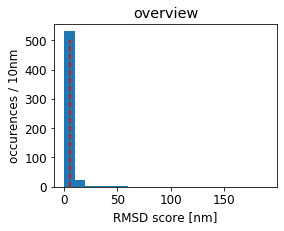

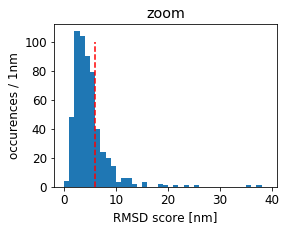

In [51]:
mpl.rcParams['font.size'] = 12
pxSize = 10
outdir = r'P:\STED-FRET\paper\SI\Supplementary Figure S9'

outallscores = os.path.join(outdir, 'scores.txt')
np.savetxt(outallscores,allscores, delimiter = ',')

plt.figure(figsize = (4,3))
plt.hist(np.array(allscores) * pxSize, bins = np.arange(0,200,10))
plt.vlines(RMSDcut * pxSize, 0,500, 'r', lineStyle = '--')
plt.xlabel('RMSD score [nm]')
plt.ylabel('occurences / 10nm')
plt.title('overview')
outname = os.path.join(outdir, 'RMSD_overview.png')
plt.savefig(outname, dpi = 300, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (4,3))
plt.hist(np.array(allscores) * pxSize, bins = np.arange(0,40,1))
plt.vlines(RMSDcut * pxSize, 0,100, 'r', lineStyle = '--')
plt.xlabel('RMSD score [nm]')
plt.ylabel('occurences / 1nm')
plt.title('zoom')
outname = os.path.join(outdir, 'RMSD_zoom.png')
plt.savefig(outname, dpi = 300, bbox_inches = 'tight')
plt.show()

### Select the best anchor

When an apriori model is not known, we can use one of the measurements as an anchor for aligning all structures to.
This has as an additional advantage that we don't insert our own assumptions in the interpretation of the data.  
To find the best anchor, all structures are considered as a model. Then all structures are aligned to this anchor. The anchor with the lowest average RMSD can then be used for the final analyis.  
Some constructs are really junk data, to prevent them heavily affecting the average RMSD, they are removed if RMSD is larger than *minscore*.  
To qualify as an anchor, at least *minconstructs* must have an RMSD lower than *minscore*. This is done to filter junk anchors.  
This is an nxn operation and can take some time..

In [61]:
#settings
minscore = RMSDcut
minconstructs = 50

[ 0.536 -0.146]
pruned 520 elements
pruned 333 elements
pruned 205 elements
pruned 543 elements
pruned 195 elements
pruned 303 elements
pruned 275 elements
pruned 201 elements
pruned 131 elements
pruned 215 elements
pruned 150 elements
pruned 553 elements
pruned 208 elements
pruned 254 elements
pruned 196 elements
pruned 313 elements
pruned 229 elements
pruned 280 elements
pruned 359 elements
pruned 166 elements
pruned 565 elements
pruned 293 elements
pruned 290 elements
pruned 189 elements
pruned 156 elements
pruned 161 elements
pruned 557 elements
pruned 386 elements
pruned 459 elements
pruned 402 elements
pruned 175 elements
pruned 499 elements
pruned 420 elements
pruned 185 elements
pruned 211 elements
pruned 305 elements
pruned 264 elements
pruned 525 elements
pruned 262 elements
pruned 254 elements
pruned 343 elements
pruned 221 elements
pruned 158 elements
pruned 399 elements
pruned 193 elements
pruned 166 elements
pruned 532 elements
pruned 196 elements
pruned 235 elements
prun

pruned 258 elements
pruned 521 elements
pruned 516 elements
pruned 352 elements
pruned 128 elements
pruned 277 elements
pruned 478 elements
pruned 364 elements
pruned 396 elements
pruned 209 elements
pruned 463 elements
pruned 295 elements
pruned 200 elements
pruned 546 elements
pruned 529 elements
pruned 451 elements
pruned 239 elements
pruned 260 elements
pruned 522 elements
pruned 266 elements
pruned 334 elements
pruned 158 elements
pruned 406 elements
pruned 565 elements
pruned 177 elements
pruned 312 elements
pruned 368 elements
pruned 212 elements
pruned 236 elements
pruned 182 elements
pruned 348 elements
pruned 372 elements
pruned 376 elements
pruned 301 elements
pruned 179 elements
pruned 179 elements
pruned 201 elements
pruned 341 elements
pruned 247 elements
pruned 201 elements
pruned 250 elements
pruned 154 elements
pruned 181 elements
pruned 541 elements
pruned 186 elements
pruned 537 elements
pruned 154 elements
pruned 371 elements
pruned 347 elements
pruned 196 elements


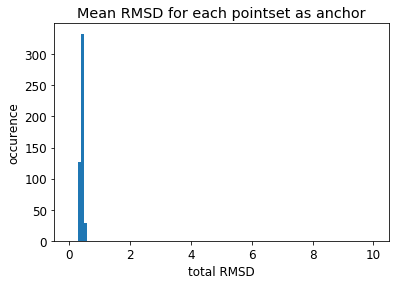

In [62]:
#leave as-is
DADAlocLst = df.selectSpotOccurence(locLst_an, [2], [2])
DADApointset = AS.ensemblePointSet(DADAlocLst, pxSize)
CoarseAlignPointset(DADApointset)

allScores = []
for i in range (len(DADApointset.pointsets)):
    DADApointset_cp = copy.deepcopy(DADApointset)
    DADApointset_cp.genAnchorFromPointset(i)
    DADApointset_cp.batchRmsd()
    DADApointset_cp.pruneByScore(minscore)
    #DADApointset_cp.plotPointsets()
    if len(DADApointset_cp.scores) > minconstructs:
        allScores.append(np.mean(DADApointset_cp.scores))
    else: allScores.append(1e5)
_ = plt.hist(allScores, range = (0,10), bins = 100)
plt.title('Mean RMSD for each pointset as anchor')
plt.ylabel('occurence')
plt.xlabel('total RMSD')
print('pointset with the lowest overall RMSD is %i' % np.argmin(allScores))

# Ancillary functions

### Rich spot stoichiometry

In [4]:
#mdify function for pretty plot
from matplotlib import patches

def plotOccurence(locLst, title = '', outname = None):
    """plots a 2D histogram of how many spots have been fitted
    in the Green and red channel.
    Takes as argument a spotLst Lst"""
    Gspots, Yspots = df.genOccurrence(locLst)
    #find max occurence
    #Gmax = max(Gspots) + 1#+1 to store zero entries
    #Ymax = max(Yspots) + 1
    Gmax = 4
    Ymax = 4
    occurence = np.zeros([Gmax,Ymax], np.int)
    for Gspot, Yspot in zip(Gspots, Yspots):
        try:
            occurence[Gspot, Yspot] += 1
        except:
            pass
    plt.figure(figsize = [6,6])
    x, y = np.meshgrid(np.arange(Gmax),np.arange(Ymax))
    plt.scatter(x,y, s = occurence.T)
    for x in range(Gmax):
        for y in range(Ymax):
            plt.annotate(occurence[x,y], (x+0.2, y))
    
    ax = plt.gca()
    border = 0.4
    ax.add_patch(patches.Rectangle((1-border,-border), 2 + 2*border, 2*border, color = 'g', fill = False
                                  , linewidth = '2'))
    ax.add_patch(patches.Rectangle((-1*border,1-border), 2.5*border, 2 + 2*border, color = 'r', fill = False
                                  , linewidth = '2'))
    ax.add_patch(patches.Rectangle((2-0.5*border,2-border), 2*border, 2*border, color = 'k', fill = False
                                  , linewidth = '2'))
    ax.set_xticks(np.arange(Ymax))
    ax.set_yticks(np.arange(Gmax))
    plt.xlim(-0.5,3.5)
    plt.ylim(-0.5,3.5)
    plt.xlabel ('# donor spots identified')
    plt.ylabel ('# acceptor spots identified')
    plt.title(title)
    if outname:
        plt.savefig(outname, bbox_inches = 'tight', dpi = 300)
    plt.show()
    return occurence

In [3]:
from matplotlib import rc
font = {'size'   : 16}
rc('font', **font)
outdir = r'P:\STED-FRET\paper\SI\spotStoichiometry'
outname = os.path.join(outdir, 'OrigamiStoichiometry_pretty.png')
plotOccurence(CLR_merged, outname = outname)
#df.plotOccurence(CLR_merged)

NameError: name 'plotOccurence' is not defined

### export $D_0$ and $A_{only}$ populations

In [44]:
outfile = os.path.join(resdir, 'D0', 'STEDCLRD0.pg4')
CLRD0 = df.selectSpotOccurence(locLst, [1], [0])
df.GetfixedlocBrightness(CLRD0, loccolor = 'G', outpath = outfile)
resdir = r'P:\STED-FRET\Origamis\data\CLR_stats'
outfile = os.path.join(resdir, 'Aonly', 'STEDCLRAonly.pg4')
CLRAonly = df.selectSpotOccurence(locLst, [0], [1])
df.GetfixedlocBrightness(CLRAonly, loccolor = 'Y', outpath = outfile)

array([[ 244,  111,  291],
       [  34,   74,  404],
       [ 641,  385,  926],
       [  15,   21,  132],
       [  48,   79,  441],
       [  38,   29,  135],
       [  47,   89,  244],
       [  44,   81,  499],
       [  25,  164,  406],
       [  23,   57,  506],
       [  12,   20,   73],
       [  53,   55,  367],
       [  14,   66,  603],
       [ 967,  351,  293],
       [  18,   25,   92],
       [ 203,  256,  222],
       [ 138,  109,  358],
       [ 223,  181,  773],
       [  93,   86,  486],
       [  19,   44,  394],
       [ 271,  311, 1415],
       [  15,   56,  537],
       [   8,   17,   67],
       [  15,   30,  130],
       [  43,   44,   95],
       [ 399,  178,  356],
       [  13,   15,   53],
       [  36,   55,  105],
       [  67,  130,  219],
       [ 131,  138,  110],
       [ 347,  234,  648],
       [  58,   54,   38],
       [  36,   47,  424],
       [ 367,  292,  325],
       [ 118,  167,  640],
       [  39,   43,  281],
       [ 116,  213,  443],
 

### Calculate theoretical precison

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   2.,  16.,  62., 141., 194., 112.,  46.,  20.,   3.,   2.,
          2.,   0.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48]),
 <a list of 24 Patch objects>)

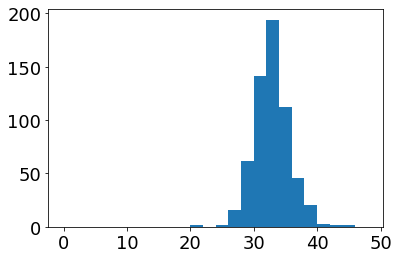

In [58]:
plt.hist(np.array(stats['sigmaY'])*10, bins = np.arange(0,50,2))

In [48]:
#A2stats = df.genStats(A2locLst)
Gspots = [2]
Yspots = [2]
filterLst = df.selectSpotOccurence(locLst, Gspots, Yspots)
stats = df.genStats(filterLst)
print('mean NG is %.0f' %
      np.mean(np.array(stats['AG']) * np.array(stats['sigmaG'])**2 *2 * np.pi))
print('mean sigmaG is %.2f' % (np.mean(stats['sigmaG'])*10))
print('mean FWHM G is %.2f' % (np.mean(stats['sigmaG'])*10 * 2.355))
print('mean bgG is %.2f' % np.mean(stats['bgG']))
print('mean NY is %.0f' %
      np.mean(np.array(stats['AY']) * np.array(stats['sigmaY'])**2 *2 * np.pi))
print('mean sigmaY is %.2f' % (np.mean(stats['sigmaY'])*10))
print('mean FWHM Y is %.2f' % (np.mean(stats['sigmaY'])*10 * 2.355))
print('mean bgY is %.2f' % np.mean(stats['bgY']))
Gprecision = np.sqrt(pF.findVar([0,0,32,0.12, 392], 10))
print('standard deviation of G Channel is %.2f nm' % Gprecision)
Yprecision = np.sqrt(pF.findVar([0,0,26,0.62, 724], 10))
print('standard deviation of Y Channel is %.2f nm' % Yprecision)
posprecision = 0
print('uncertainty in dye position is assumed to be %.2f nm' % posprecision)
chiSigma = np.sqrt (Gprecision**2 + Yprecision**2 + posprecision**2)
print('expected sigma of chi distribution is %.2f nm' % chiSigma)
#df.estChiSigma(29, 25, 147, 605, 0.11, 0.58, 10, 2)
RMSDprecision = np.sqrt ( 2 * Gprecision**2 + 2* Yprecision**2 + 4 * posprecision**2)
print('expected RMSD value is %.2f' % RMSDprecision )

outname = r'P:\STED-FRET\paper\SI\Supplementary Figure S17\CLR-2D2A\CLR-2D2A.txt'
utility.reportLocStats(filterLst, outname = outname)

mean NG is 691
mean sigmaG is 37.74
mean FWHM G is 88.88
mean bgG is 0.37
mean NY is 804
mean sigmaY is 33.23
mean FWHM Y is 78.27
mean bgY is 0.49
integral in variance has value -0.047370
standard deviation of G Channel is 1.66 nm
integral in variance has value -0.200107
standard deviation of Y Channel is 1.09 nm
uncertainty in dye position is assumed to be 0.00 nm
expected sigma of chi distribution is 1.99 nm
expected RMSD value is 2.81


KeyError: 'stoichiometry'